In [1]:
# notebook to illustrate extracting topics using SVD

In [2]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

In [3]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [4]:
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/simple_test/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/recipes/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(directory_of_files="data_sets/mystery_corpus_01/txt/", text_filename_pattern="??.txt")
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/iraq_inquiry/txt/", text_filename_pattern="the-report*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/clinton_emails/txt/", text_filename_pattern="C0*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/shakespeare_macbeth/txt/", text_filename_pattern="macbeth_act_0?_scene_0?.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/mixed/txt/", text_filename_pattern="*.txt")

content_directory =  data_sets/iraq_inquiry/txt/
text_filename_pattern =  the-report*.txt
self.documents populated =  58


In [5]:
# first clear index
tmt.index_wordcount.delete_index(cr.content_directory)

# for all documents in corpus
for document_name in cr.get_documents():
    #print("processing ", document_name)

    # get document text
    document_text = cr.get_text_by_document(document_name)

    # simplify whitespace (remove newlines)
    b = tmt.text_processing.simplify_whitespace(document_text)

    # only keep alphanumeric characters, removes punctuation
    c = tmt.text_processing.keep_only_alphanumeric(b)

    # make lowercase
    d = tmt.text_processing.to_lowercase(c)

    # split into words list
    dl = tmt.text_processing.split_text_into_words(d)
    
    # build n-grams
    #gl = tmt.word_processing.build_ngrams_from_words(dl,2)

    # remove stop words
    el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")
    
    # update index
    tmt.index_wordcount.create_wordcount_index_for_document(cr.content_directory, document_name, el)
    pass

In [6]:
# merge document indices into a corpus index
tmt.index_wordcount.merge_wordcount_indices_for_corpus(cr.content_directory)

saving corpus word count index ...  data_sets/iraq_inquiry/txt/index_wordcount.hdf5


In [7]:
# delete and build relevance index
tmt.index_relevance.delete_index(cr.content_directory)
tmt.index_relevance.calculate_relevance_index(cr.content_directory)

saving corpus relevance index ...  data_sets/iraq_inquiry/txt/index_relevance.hdf5


In [8]:
# delete and rebuild SVD of doc-term matrix
tmt.svd.delete_svd(cr.content_directory)
tmt.svd.calculate_singular_value_decomposition(cr.content_directory)

saving singular value decomposition ...  data_sets/iraq_inquiry/txt/svd.hdf5


In [9]:
# get SVD eigenvalues
eigenvalues = tmt.svd.get_svd_eigenvalues(cr.content_directory)

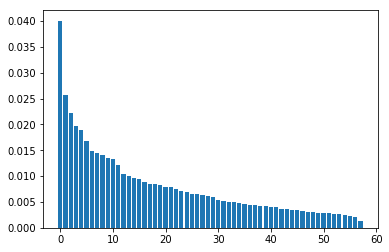

In [10]:
# visualise the SVD eigenvalues as a barchart to see most significant
tmt.visualisation.plot_bar_chart(eigenvalues)

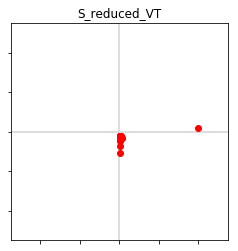

In [5]:
# get document-view projection onto 2 dimensions
document_view = tmt.svd.get_document_view(cr.content_directory)

# plot documents in reduced dimension space with a 2-d scatter 
tmt.visualisation.plot_scatter_chart(document_view)

In [6]:
document_view.T[document_view.T[1] < -0.006]

,0,1
the-report-of-the-iraq-inquiry_section-111.txt,0.000499,-0.007369
the-report-of-the-iraq-inquiry_section-112.txt,0.000415,-0.010617


In [17]:
# get top n topics, n is usually the same as key dimensions identified by the eigenvalue bar chart above
number_of_topics = 10
# how many words in each topic (the most significant)
topic_length = 10

topics_list = tmt.svd.get_topics(cr.content_directory, number_of_topics, topic_length)

In [18]:
for i, topic in enumerate(topics_list):
    print(" topic #", i)
    print(topic, "\n")
    pass

 topic # 0
multinational    0.019513
map              0.018873
mndn             0.009999
maps             0.009649
division         0.007975
dissolved        0.005887
provinces        0.005885
southeast        0.005879
mnfnw            0.005734
mndnc            0.005734
Name: 0, dtype: float64 

 topic # 1
debaathification    0.010073
resolution          0.003564
basra               0.002889
weapons             0.002380
had                 0.002360
inspectors          0.002251
destruction         0.002238
cpa                 0.002217
wmd                 0.002115
biological          0.002111
Name: 1, dtype: float64 

 topic # 2
debaathification    0.016325
baath               0.002761
resolution          0.002180
postinvasion        0.002080
no1                 0.002078
bremer              0.002075
weapons             0.001960
destruction         0.001869
baathists           0.001798
biological          0.001708
Name: 2, dtype: float64 

 topic # 3
telegrams      0.008248
quotes        

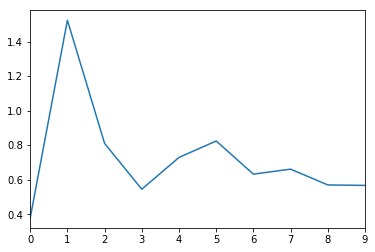

In [19]:
# indicator of topic significance by visualising the magnitude of the topic elements
x = tmt.svd.get_word_view(cr.content_directory,10)
x.abs().sum().plot()